# Unit04_Matplotlib | Python 資料視覺化基礎

本 Notebook 提供 Matplotlib 模組的完整學習範例，涵蓋基本圖表繪製、圖表自訂、多圖佈局與化工領域應用案例。

## 目標
- 掌握 Matplotlib 基本繪圖流程
- 學習常用圖表類型（折線圖、散佈圖、長條圖、直方圖、圓餅圖）
- 熟悉圖表自訂與美化技巧
- 應用於化工領域數據視覺化

參考教材：Unit04_Matplotlib.md

---
## 0. 環境設定

In [1]:
from pathlib import Path
import os

# ========================================
# 路徑設定 (兼容 Colab 與 Local)
# ========================================
UNIT_OUTPUT_DIR = 'P1_Unit04_Matplotlib'

try:
  from google.colab import drive
  IN_COLAB = True
  print("✓ 偵測到 Colab 環境，準備掛載 Google Drive...")
  drive.mount('/content/drive', force_remount=True)
except ImportError:
  IN_COLAB = False
  print("✓ 偵測到 Local 環境")

try:
  shortcut_path = '/content/CHE-AI-COURSE'
  os.remove(shortcut_path)
except FileNotFoundError:
  pass

if IN_COLAB:
  source_path = Path('/content/drive/My Drive/Colab Notebooks/CHE-AI-COURSE')
  os.symlink(source_path, shortcut_path)
  shortcut_path = Path(shortcut_path)
  if source_path.exists():
    NOTEBOOK_DIR = shortcut_path / 'Part_1' / 'Unit04'
    OUTPUT_DIR = NOTEBOOK_DIR / 'outputs' / UNIT_OUTPUT_DIR
    FIG_DIR = OUTPUT_DIR / 'figs'
  else:
    print(f"⚠️ 找不到路徑雲端CHE-AI-COURSE路徑，請確認自己的雲端資料夾是否正確")
  
else:
  NOTEBOOK_DIR = Path.cwd()
  OUTPUT_DIR = NOTEBOOK_DIR / 'outputs' / UNIT_OUTPUT_DIR
  FIG_DIR = OUTPUT_DIR / 'figs'

NOTEBOOK_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

print(f"\n✓ Notebook工作目錄: {NOTEBOOK_DIR}")
print(f"✓ 結果輸出目錄: {OUTPUT_DIR}")
print(f"✓ 圖檔輸出目錄: {FIG_DIR}")

✓ 偵測到 Local 環境

✓ Notebook工作目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04
✓ 結果輸出目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib
✓ 圖檔輸出目錄: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib\figs


---
## 1. 載入相關套件

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 設定 Matplotlib 顯示中文（僅供參考，本課程使用英文標籤）
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# mpl.rcParams['axes.unicode_minus'] = False

# 在 Jupyter Notebook 中顯示圖表
%matplotlib inline

print("✓ 套件載入完成")
print(f"Matplotlib 版本: {plt.matplotlib.__version__}")
print(f"NumPy 版本: {np.__version__}")
print(f"Pandas 版本: {pd.__version__}")

✓ 套件載入完成
Matplotlib 版本: 3.10.8
NumPy 版本: 1.23.5
Pandas 版本: 2.3.3


---
## 2. 基本繪圖流程

### 2.1 最簡單的折線圖

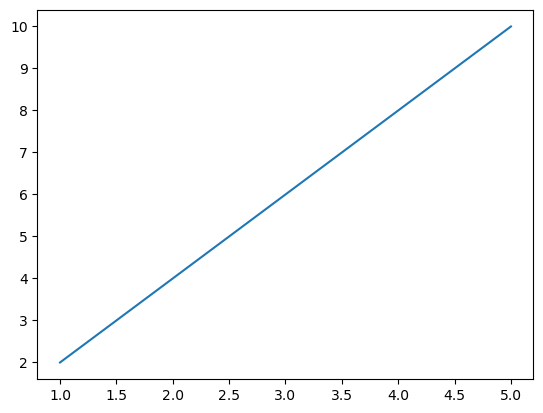

In [3]:
# 準備數據
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# 繪製圖表
plt.plot(x, y)
plt.show()

### 2.2 完整的繪圖流程（含標題、標籤、圖例）

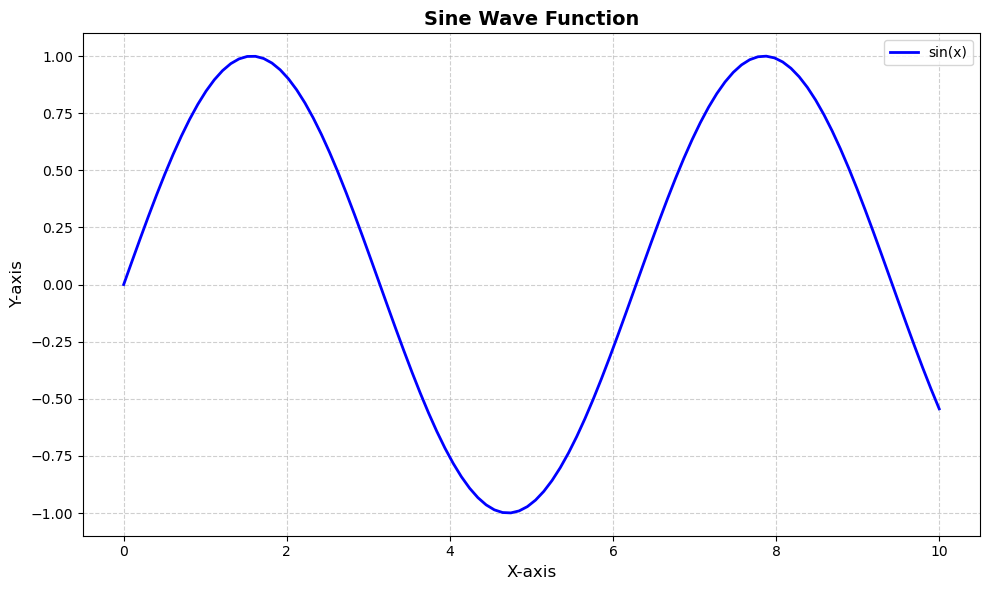

In [4]:
# 1. 準備數據
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 2. 建立圖表
plt.figure(figsize=(10, 6))

# 3. 繪製數據
plt.plot(x, y, label='sin(x)', color='blue', linewidth=2)

# 4. 添加標題與標籤（必須使用英文）
plt.title('Sine Wave Function', fontsize=14, fontweight='bold')
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)

# 5. 添加圖例與網格
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 6. 顯示圖表
plt.tight_layout()
plt.show()

---
## 3. 常用圖表類型

### 3.1 折線圖 (Line Plot)

#### 基本折線圖

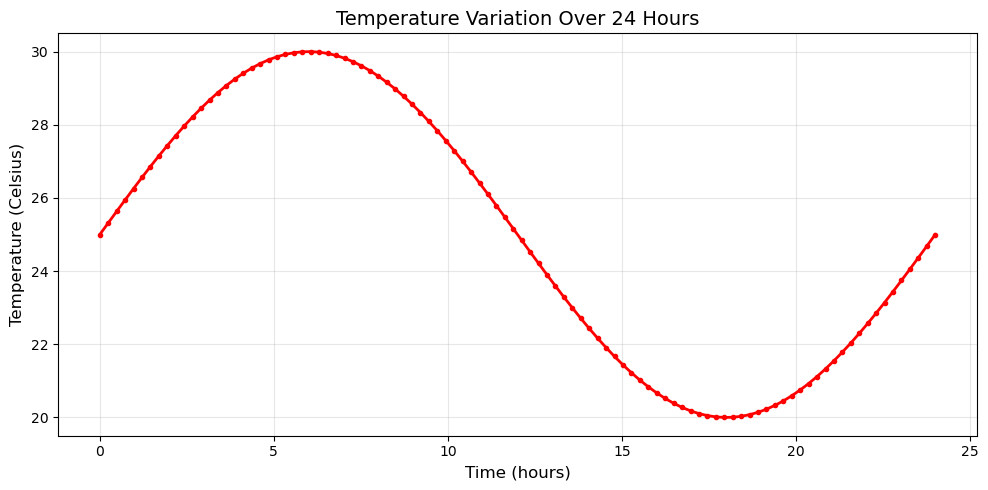

In [5]:
# 準備數據：24小時溫度變化
time = np.linspace(0, 24, 100)
temperature = 25 + 5 * np.sin(2 * np.pi * time / 24)

# 繪製折線圖
plt.figure(figsize=(10, 5))
plt.plot(time, temperature, color='red', linewidth=2, linestyle='-', marker='o', markersize=3)

plt.title('Temperature Variation Over 24 Hours', fontsize=14)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 化工應用範例：反應器溫度監控

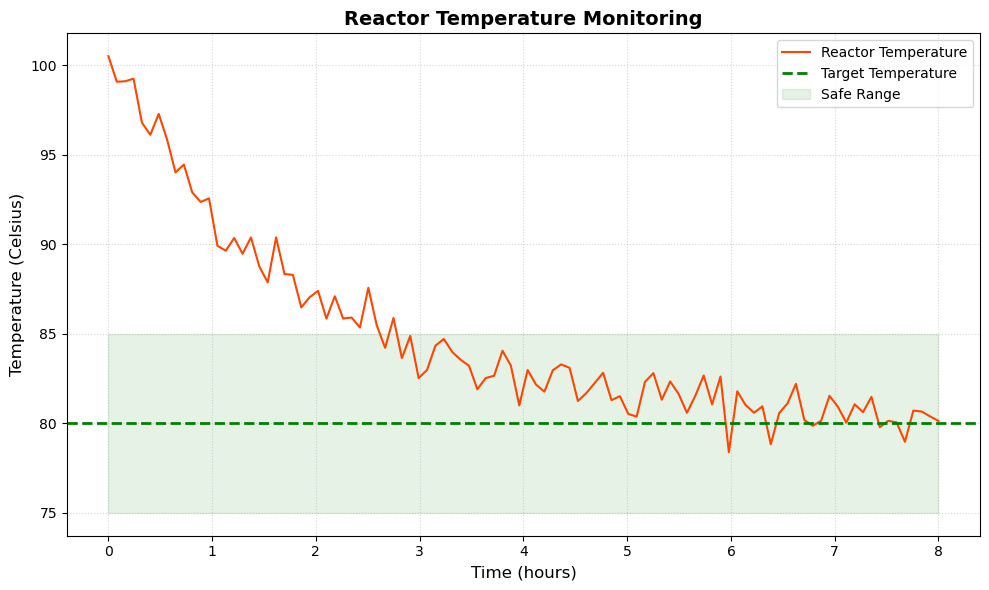

In [6]:
# 模擬反應器溫度數據
np.random.seed(42)
time = np.linspace(0, 8, 100)  # 8 hours
reactor_temp = 80 + 20 * np.exp(-0.5 * time) + np.random.normal(0, 1, 100)

plt.figure(figsize=(10, 6))
plt.plot(time, reactor_temp, color='orangered', linewidth=1.5, label='Reactor Temperature')
plt.axhline(y=80, color='green', linestyle='--', linewidth=2, label='Target Temperature')
plt.fill_between(time, 75, 85, color='green', alpha=0.1, label='Safe Range')

plt.title('Reactor Temperature Monitoring', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.2 散佈圖 (Scatter Plot)

#### 基本散佈圖

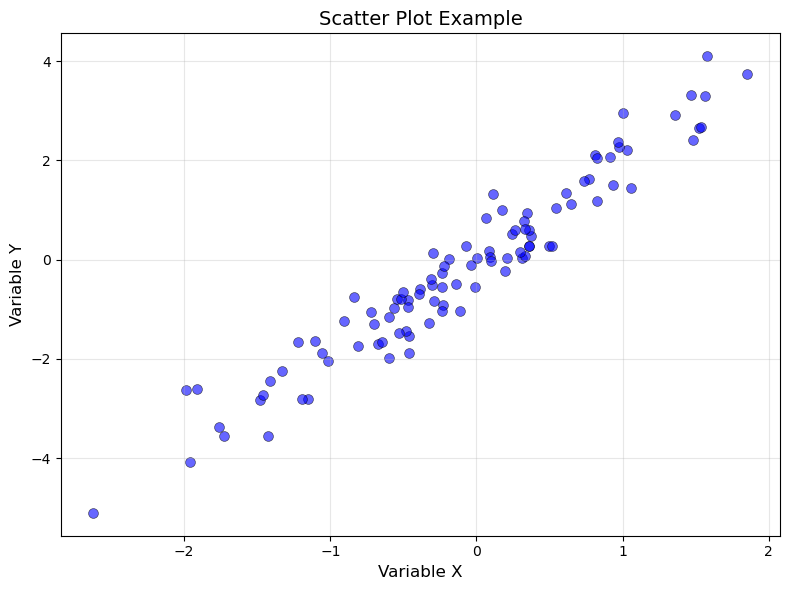

In [7]:
# 準備數據
np.random.seed(42)
x = np.random.randn(100)
y = 2 * x + np.random.randn(100) * 0.5

# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

plt.title('Scatter Plot Example', fontsize=14)
plt.xlabel('Variable X', fontsize=12)
plt.ylabel('Variable Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 化工應用範例：反應溫度 vs 產率關係

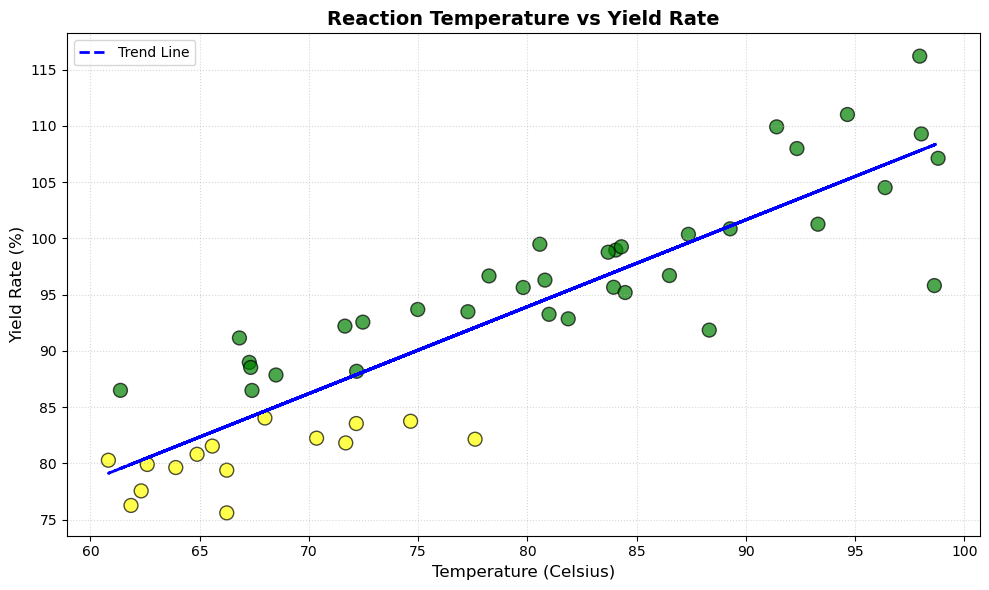

In [8]:
# 模擬數據：反應溫度 vs 產率
np.random.seed(42)
temperature = np.random.uniform(60, 100, 50)
yield_rate = 30 + 0.8 * temperature + np.random.normal(0, 5, 50)

# 根據產率分組著色
colors = ['red' if y < 70 else 'yellow' if y < 85 else 'green' for y in yield_rate]

plt.figure(figsize=(10, 6))
plt.scatter(temperature, yield_rate, c=colors, s=100, alpha=0.7, edgecolors='black', linewidth=1)

# 添加趨勢線
z = np.polyfit(temperature, yield_rate, 1)
p = np.poly1d(z)
plt.plot(temperature, p(temperature), "b--", linewidth=2, label='Trend Line')

plt.title('Reaction Temperature vs Yield Rate', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (Celsius)', fontsize=12)
plt.ylabel('Yield Rate (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.3 長條圖 (Bar Chart)

#### 基本長條圖

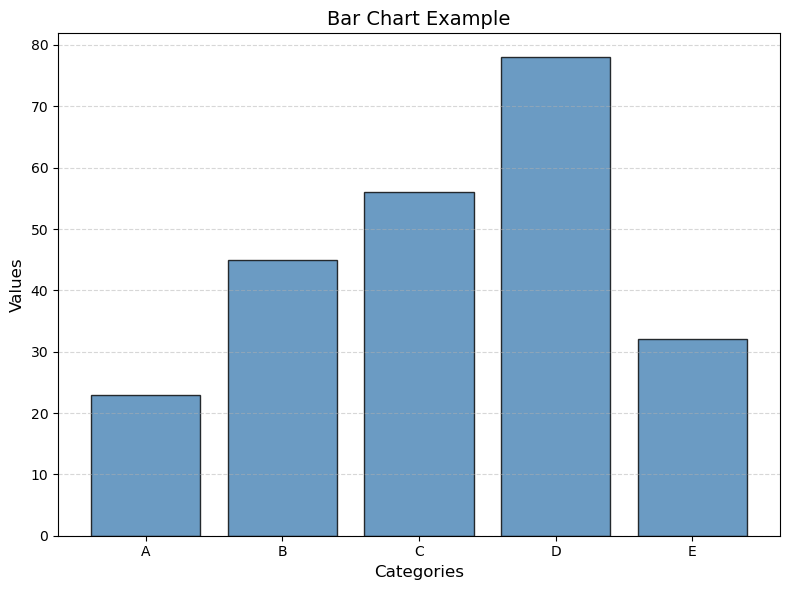

In [9]:
# 準備數據
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 32]

# 繪製長條圖
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='steelblue', alpha=0.8, edgecolor='black')

plt.title('Bar Chart Example', fontsize=14)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 化工應用範例：催化劑效能比較（分組長條圖）

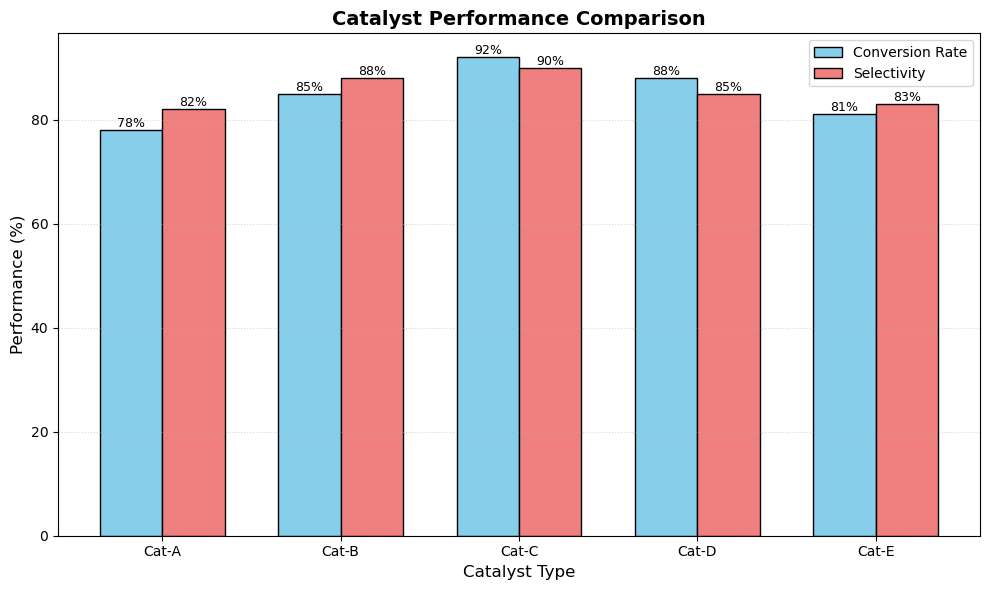

In [10]:
# 催化劑效能數據
catalysts = ['Cat-A', 'Cat-B', 'Cat-C', 'Cat-D', 'Cat-E']
conversion_rate = [78, 85, 92, 88, 81]
selectivity = [82, 88, 90, 85, 83]

x = np.arange(len(catalysts))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, conversion_rate, width, label='Conversion Rate', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, selectivity, width, label='Selectivity', color='lightcoral', edgecolor='black')

# 在長條上添加數值標籤
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=9)

ax.set_title('Catalyst Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Catalyst Type', fontsize=12)
ax.set_ylabel('Performance (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(catalysts)
ax.legend()
ax.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

### 3.4 直方圖 (Histogram)

#### 化工應用範例：產品粒徑分布

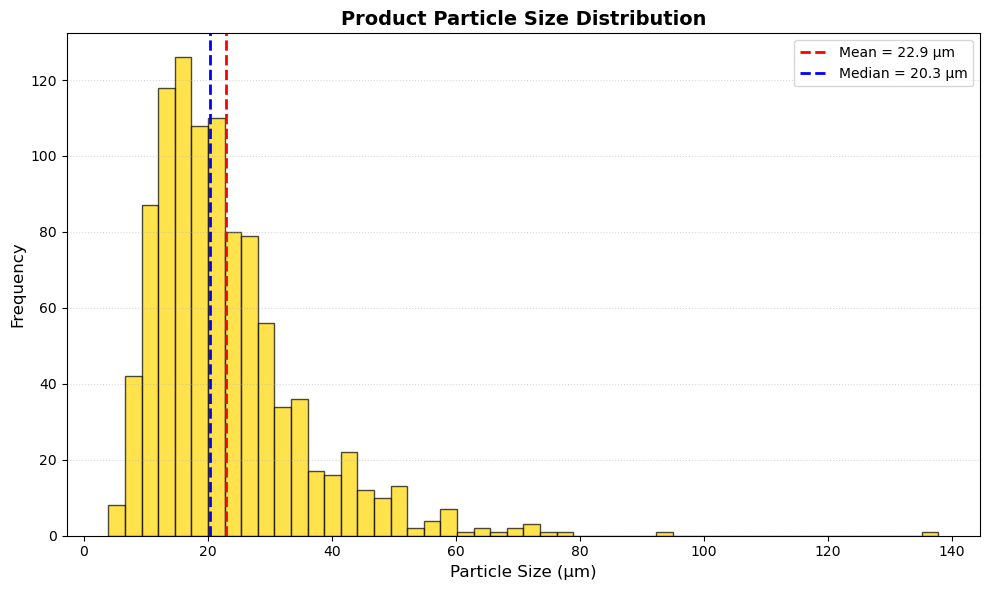

In [11]:
# 模擬產品粒徑數據（微米）
np.random.seed(42)
particle_size = np.random.lognormal(3, 0.5, 1000)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(particle_size, bins=50, color='gold', alpha=0.7, edgecolor='black')

# 添加統計線
mean_size = np.mean(particle_size)
median_size = np.median(particle_size)
plt.axvline(mean_size, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_size:.1f} μm')
plt.axvline(median_size, color='blue', linestyle='--', linewidth=2, label=f'Median = {median_size:.1f} μm')

plt.title('Product Particle Size Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Particle Size (μm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.5 圓餅圖 (Pie Chart)

#### 化工應用範例：生產成本結構

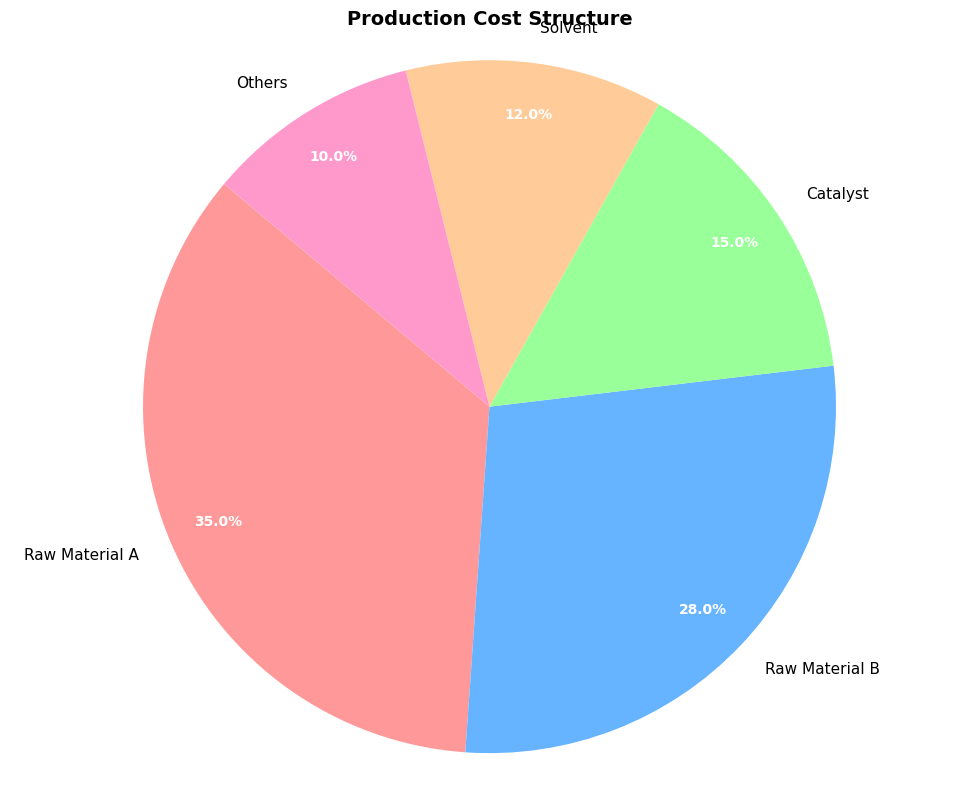

In [12]:
# 原料成本數據
materials = ['Raw Material A', 'Raw Material B', 'Catalyst', 'Solvent', 'Others']
costs = [35, 28, 15, 12, 10]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(costs, labels=materials, colors=colors, autopct='%1.1f%%',
                                     startangle=140, pctdistance=0.85)

# 美化文字
for text in texts:
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.title('Production Cost Structure', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

---
## 4. 多圖表佈局

### 4.1 基本 Subplot (2x2 佈局)

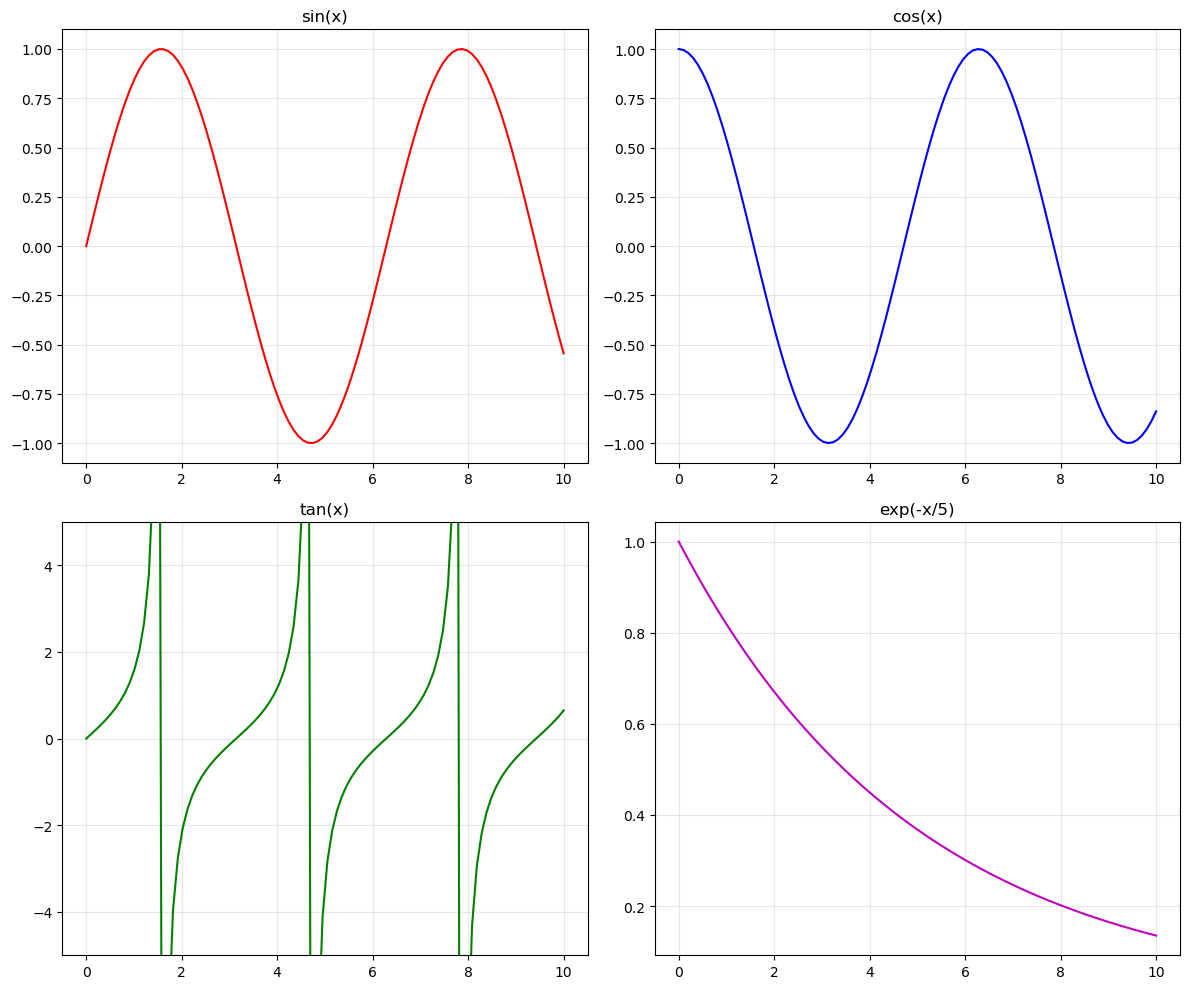

In [13]:
x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 第一個子圖
axes[0, 0].plot(x, np.sin(x), 'r-')
axes[0, 0].set_title('sin(x)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 第二個子圖
axes[0, 1].plot(x, np.cos(x), 'b-')
axes[0, 1].set_title('cos(x)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 第三個子圖
axes[1, 0].plot(x, np.tan(x), 'g-')
axes[1, 0].set_title('tan(x)', fontsize=12)
axes[1, 0].set_ylim(-5, 5)
axes[1, 0].grid(True, alpha=0.3)

# 第四個子圖
axes[1, 1].plot(x, np.exp(-x/5), 'm-')
axes[1, 1].set_title('exp(-x/5)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 化工應用範例：反應器多參數監控儀表板

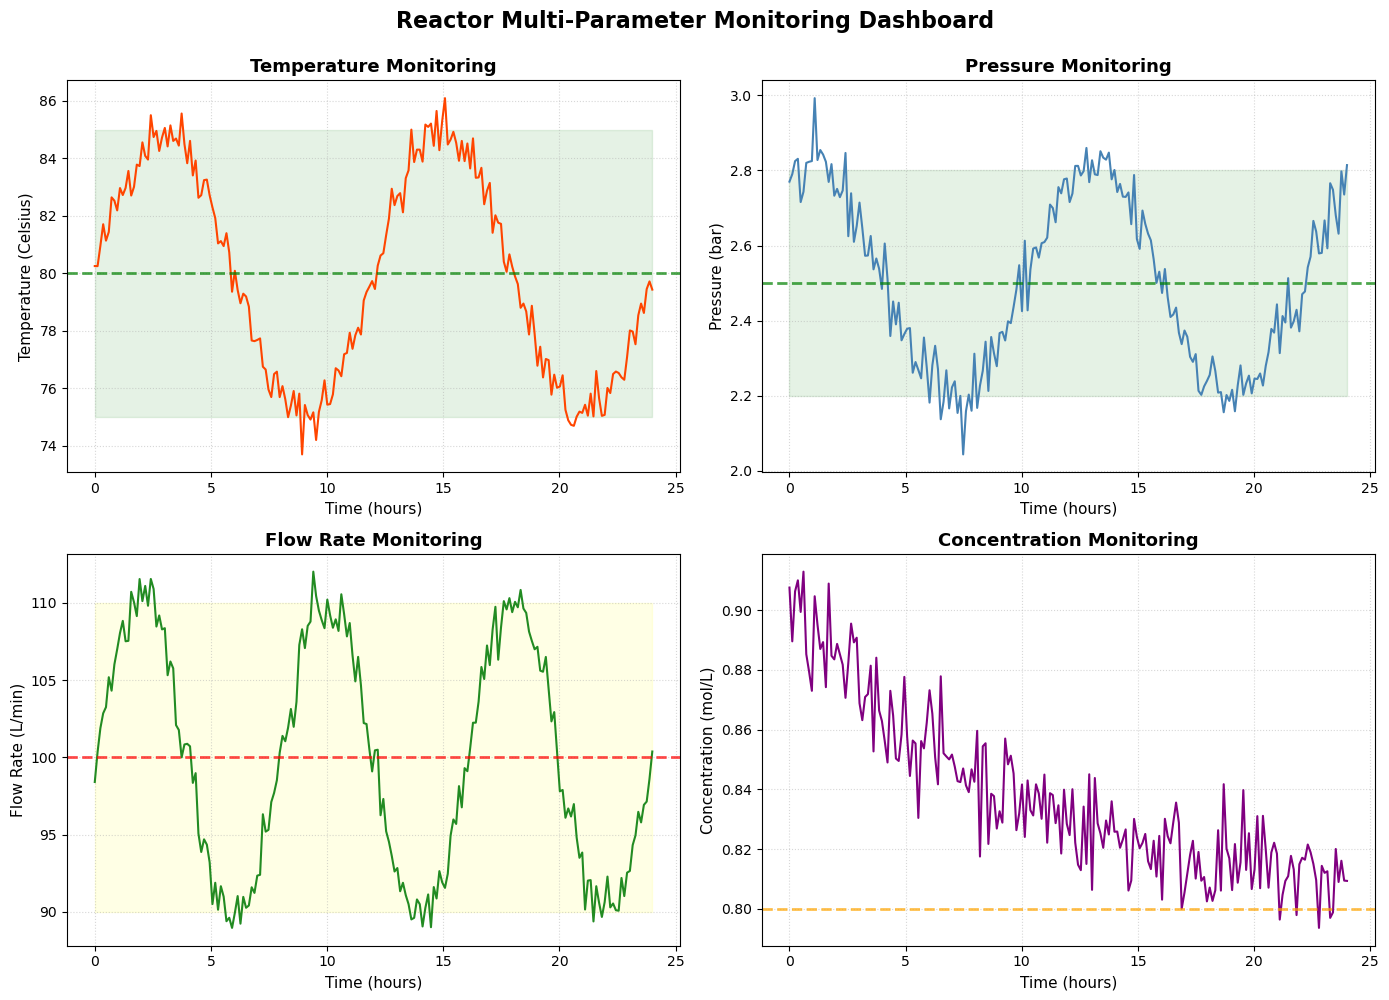

In [14]:
# 生成模擬數據
np.random.seed(42)
time = np.linspace(0, 24, 200)
temperature = 80 + 5 * np.sin(2 * np.pi * time / 12) + np.random.normal(0, 0.5, 200)
pressure = 2.5 + 0.3 * np.sin(2 * np.pi * time / 12 + 1) + np.random.normal(0, 0.05, 200)
flow_rate = 100 + 10 * np.sin(2 * np.pi * time / 8) + np.random.normal(0, 1, 200)
concentration = 0.8 + 0.1 * np.exp(-time/10) + np.random.normal(0, 0.01, 200)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 溫度
axes[0, 0].plot(time, temperature, color='orangered', linewidth=1.5)
axes[0, 0].axhline(y=80, color='green', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 0].fill_between(time, 75, 85, color='green', alpha=0.1)
axes[0, 0].set_title('Temperature Monitoring', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Time (hours)', fontsize=11)
axes[0, 0].set_ylabel('Temperature (Celsius)', fontsize=11)
axes[0, 0].grid(True, linestyle=':', alpha=0.5)

# 壓力
axes[0, 1].plot(time, pressure, color='steelblue', linewidth=1.5)
axes[0, 1].axhline(y=2.5, color='green', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 1].fill_between(time, 2.2, 2.8, color='green', alpha=0.1)
axes[0, 1].set_title('Pressure Monitoring', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Time (hours)', fontsize=11)
axes[0, 1].set_ylabel('Pressure (bar)', fontsize=11)
axes[0, 1].grid(True, linestyle=':', alpha=0.5)

# 流量
axes[1, 0].plot(time, flow_rate, color='forestgreen', linewidth=1.5)
axes[1, 0].axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1, 0].fill_between(time, 90, 110, color='yellow', alpha=0.1)
axes[1, 0].set_title('Flow Rate Monitoring', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Time (hours)', fontsize=11)
axes[1, 0].set_ylabel('Flow Rate (L/min)', fontsize=11)
axes[1, 0].grid(True, linestyle=':', alpha=0.5)

# 濃度
axes[1, 1].plot(time, concentration, color='purple', linewidth=1.5)
axes[1, 1].axhline(y=0.8, color='orange', linestyle='--', linewidth=2, alpha=0.7)
axes[1, 1].set_title('Concentration Monitoring', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Time (hours)', fontsize=11)
axes[1, 1].set_ylabel('Concentration (mol/L)', fontsize=11)
axes[1, 1].grid(True, linestyle=':', alpha=0.5)

fig.suptitle('Reactor Multi-Parameter Monitoring Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

---
## 5. 進階應用：雙 Y 軸圖表

### 5.1 化工應用範例：反應器溫度與轉化率

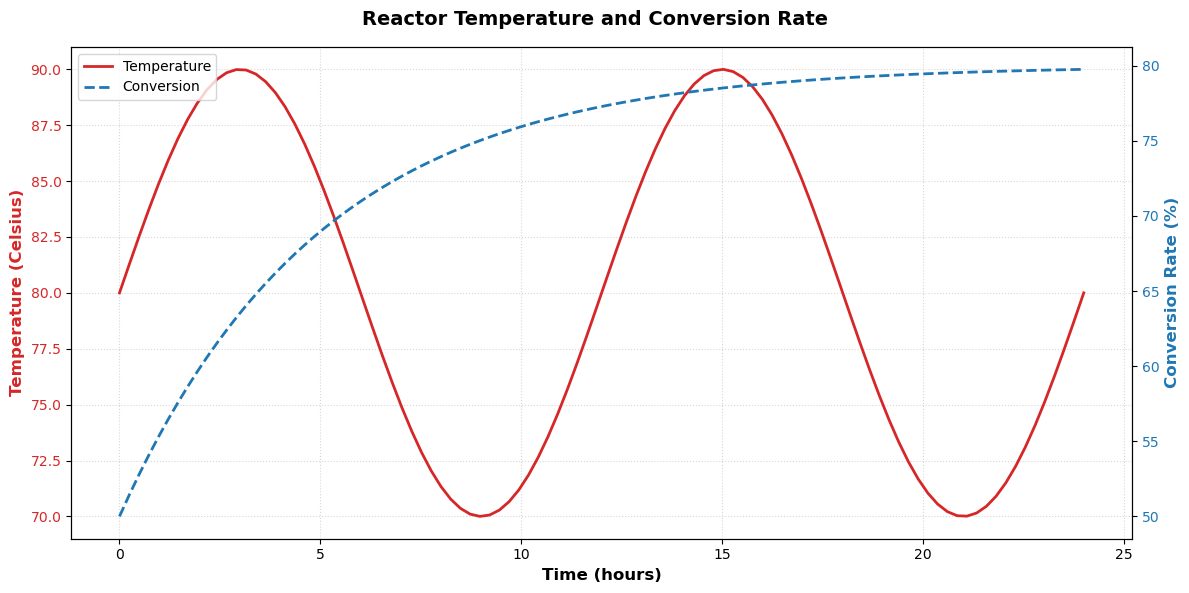

In [15]:
# 生成模擬數據
time = np.linspace(0, 24, 100)
temperature = 80 + 10 * np.sin(2 * np.pi * time / 12)
conversion = 50 + 30 * (1 - np.exp(-time/5))

fig, ax1 = plt.subplots(figsize=(12, 6))

# 第一個 Y 軸（溫度）
color = 'tab:red'
ax1.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Temperature (Celsius)', color=color, fontsize=12, fontweight='bold')
ax1.plot(time, temperature, color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle=':', alpha=0.5)

# 第二個 Y 軸（轉化率）
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Conversion Rate (%)', color=color, fontsize=12, fontweight='bold')
ax2.plot(time, conversion, color=color, linewidth=2, linestyle='--', label='Conversion')
ax2.tick_params(axis='y', labelcolor=color)

# 標題與圖例
fig.suptitle('Reactor Temperature and Conversion Rate', fontsize=14, fontweight='bold')

# 合併圖例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

---
## 6. 圖表儲存與輸出

### 6.1 儲存圖表到檔案

✓ 圖表已儲存至: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib\figs\sample_plot.png


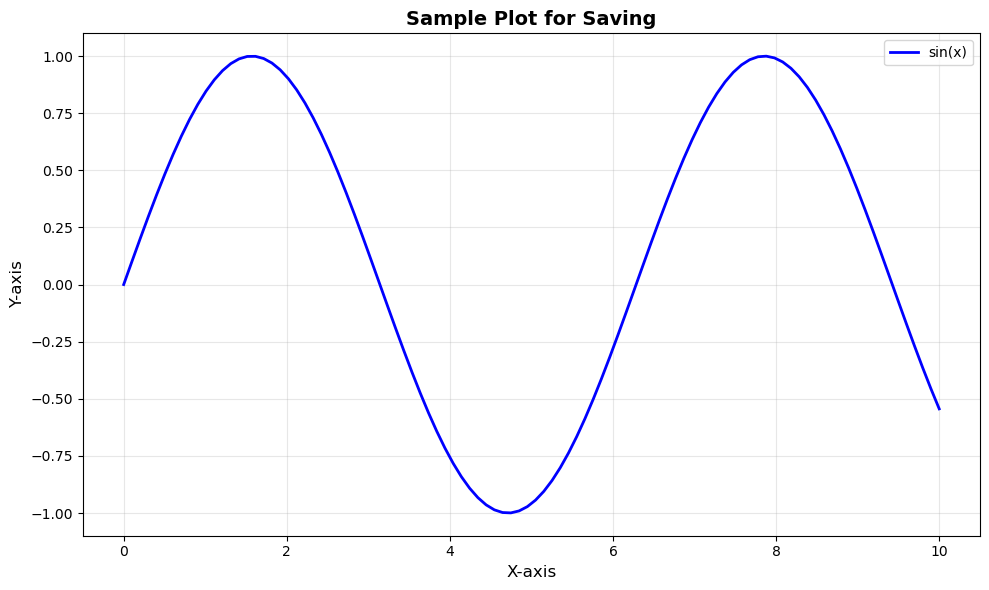

In [16]:
# 建立範例圖表
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, linewidth=2, color='blue', label='sin(x)')
plt.title('Sample Plot for Saving', fontsize=14, fontweight='bold')
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 儲存為 PNG 檔案（高解析度）
save_path = FIG_DIR / 'sample_plot.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✓ 圖表已儲存至: {save_path}")

plt.show()

### 6.2 儲存不同格式

✓ 已儲存 PNG 格式: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib\figs\multi_format_plot.png
✓ 已儲存 PDF 格式: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib\figs\multi_format_plot.pdf
✓ 已儲存 SVG 格式: d:\MyGit\CHE-AI-COURSE\Part_1\Unit04\outputs\P1_Unit04_Matplotlib\figs\multi_format_plot.svg


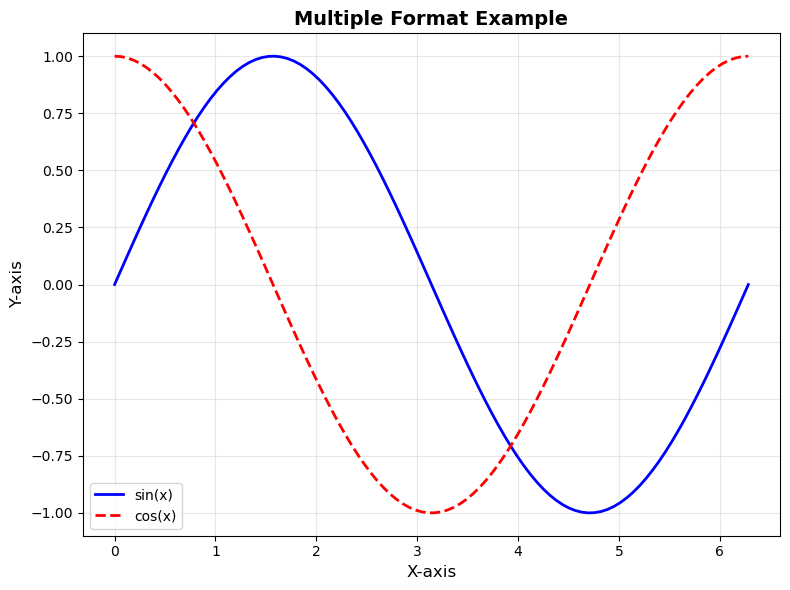

In [17]:
# 建立範例圖表
fig, ax = plt.subplots(figsize=(8, 6))
x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.sin(x), 'b-', linewidth=2, label='sin(x)')
ax.plot(x, np.cos(x), 'r--', linewidth=2, label='cos(x)')
ax.set_title('Multiple Format Example', fontsize=14, fontweight='bold')
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

# 儲存為多種格式
formats = ['png', 'pdf', 'svg']
for fmt in formats:
    save_path = FIG_DIR / f'multi_format_plot.{fmt}'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ 已儲存 {fmt.upper()} 格式: {save_path}")

plt.show()

---
## 7. 小結

本 Notebook 完整介紹了 Matplotlib 的基本功能與應用：

### 主要內容
1. **基本繪圖流程**：理解從數據準備到圖表顯示的完整流程
2. **常用圖表類型**：
   - 折線圖 (Line Plot)：適合時間序列與趨勢分析
   - 散佈圖 (Scatter Plot)：適合探索變數間的相關性
   - 長條圖 (Bar Chart)：適合類別數據比較
   - 直方圖 (Histogram)：適合數據分布分析
   - 圓餅圖 (Pie Chart)：適合比例結構展示
3. **多圖佈局**：使用 subplot 建立多圖表儀表板
4. **進階應用**：雙 Y 軸圖表
5. **圖表儲存**：多種格式輸出

### 化工領域應用案例
- 反應器溫度監控
- 產品品質與製程參數關係分析
- 催化劑效能比較
- 產品粒徑分布分析
- 生產成本結構分析
- 製程多參數監控儀表板

### 重要提醒
- **所有圖表標題、軸標籤必須使用英文**
- 適當選擇圖表類型以呈現數據特性
- 使用 `plt.tight_layout()` 避免圖表元素重疊
- 儲存高解析度圖表時使用 `dpi=300`

### 下一步學習
- 完成 Unit04_Matplotlib_Homework.ipynb 作業練習
- 進階學習 Unit04_Seaborn 統計視覺化
- 探索更多 Matplotlib 進階功能（3D 繪圖、動畫等）

---

**課程資源：**
- 教學講義：[Unit04_Matplotlib.md](Unit04_Matplotlib.md)
- 官方文件：https://matplotlib.org/
- 圖表範例庫：https://matplotlib.org/stable/gallery/index.html